core           INFO 	Loading data for Monaco Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '81', '55', '4', '63', '1', '44', '22', '23', '10', '14', '3', '77', '18', '2', '24', '31', '11', '27', '20']
c:\Users\dilau\Desktop\Develope-ghit\virtuale\.venv\Lib\site-pa

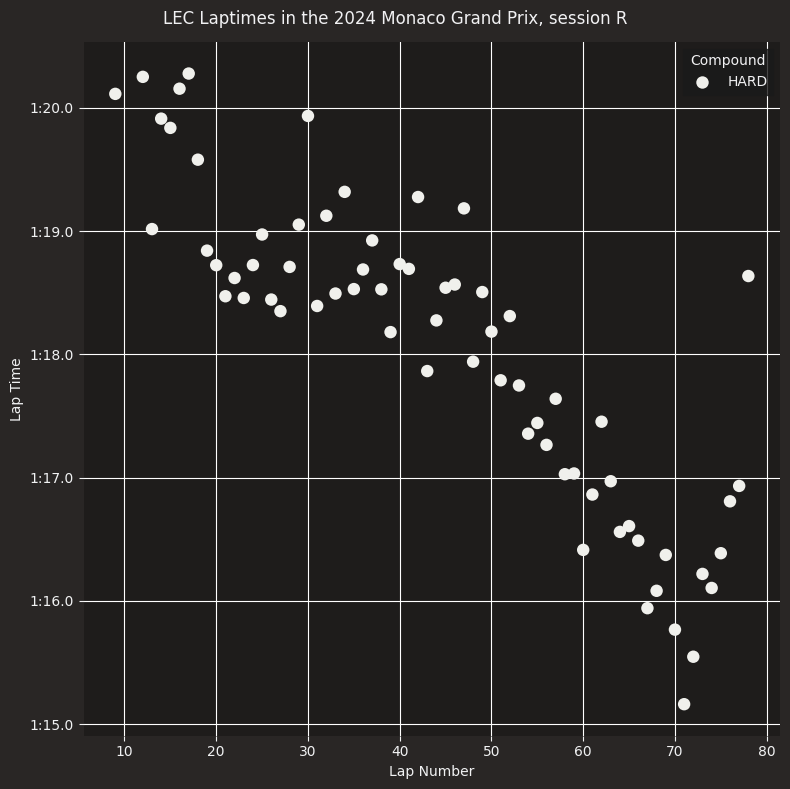

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

import fastf1
import fastf1.plotting

#fastf1.Cache.enable_cache('cache')

year = 2024
gran_prix = "Monaco"
sessionG = 'R' #1 letter session

driver = "LEC" #3 letter driver

# Enable Matplotlib patches for plotting timedelta values and load
# FastF1's dark color scheme
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, misc_mpl_mods=False,
                          color_scheme='fastf1')
#Load the race session.

race = fastf1.get_session(year, gran_prix, sessionG)
race.load()
#Get all the laps for a single driver. Filter out slow laps as they distort the graph axis.

driver_laps = race.laps.pick_driver(driver).pick_quicklaps().reset_index()

#Make the scattterplot using lap number as x-axis and lap time as y-axis. Marker colors correspond to the compounds used.
# Note: as LapTime is represented by timedelta, calling setup_mpl earlier is required.

fig, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(data=driver_laps,
                x="LapNumber",
                y="LapTime",
                ax=ax,
                hue="Compound",
                palette=fastf1.plotting.get_compound_mapping(session=race),
                s=80,
                linewidth=0,
                legend='auto')

# Make the plot more aesthetic.

ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")

# The y-axis increases from bottom to top by default
# Since we are plotting time, it makes sense to invert the axis
ax.invert_yaxis()
plt.suptitle(f"{driver} Laptimes in the {year} {gran_prix} Grand Prix, session {sessionG}")

# Turn on major grid lines
plt.grid(color='w', which='major', axis='both')
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

In [23]:
print(driver_laps[driver_laps["Driver"]=='LEC'])

    index                   Time Driver DriverNumber                LapTime  \
0       8 0 days 01:48:32.513000    LEC           16 0 days 00:01:20.114000   
1      11 0 days 01:52:34.586000    LEC           16 0 days 00:01:20.252000   
2      12 0 days 01:53:53.603000    LEC           16 0 days 00:01:19.017000   
3      13 0 days 01:55:13.516000    LEC           16 0 days 00:01:19.913000   
4      14 0 days 01:56:33.354000    LEC           16 0 days 00:01:19.838000   
..    ...                    ...    ...          ...                    ...   
63     73 0 days 03:13:12.803000    LEC           16 0 days 00:01:16.105000   
64     74 0 days 03:14:29.190000    LEC           16 0 days 00:01:16.387000   
65     75 0 days 03:15:45.998000    LEC           16 0 days 00:01:16.808000   
66     76 0 days 03:17:02.931000    LEC           16 0 days 00:01:16.933000   
67     77 0 days 03:18:21.567000    LEC           16 0 days 00:01:18.636000   

    LapNumber  Stint PitOutTime PitInTime          

In [24]:
driver_laps.shape

(68, 32)

In [25]:
driver_laps.describe()

,index,Time,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,TyreLife,LapStartTime,LapStartDate,Position
count,68.000000,68,68,68.000000,68.0,0,0,68,68,68,...,68,68,65.000000,68.000000,68.000000,68.000000,68.000000,68,68,68.0
mean,43.470588,0 days 02:35:05.828632352,0 days 00:01:18.049220588,44.470588,2.0,NaT,NaT,0 days 00:00:20.411073529,0 days 00:00:36.692485294,0 days 00:00:20.945661764,...,0 days 02:34:44.882970588,0 days 02:35:05.828632352,199.953846,184.794118,255.779412,276.264706,43.470588,0 days 02:33:47.779411764,2024-05-26 14:41:53.168411648,1.0
min,8.000000,0 days 01:48:32.513000,0 days 00:01:15.162000,9.000000,2.0,NaT,NaT,0 days 00:00:19.716000,0 days 00:00:35.501000,0 days 00:00:19.942000,...,0 days 01:48:11.103000,0 days 01:48:32.513000,194.000000,175.000000,209.000000,270.000000,8.000000,0 days 01:47:12.399000,2024-05-26 13:55:17.788000,1.0
25%,26.750000,0 days 02:13:20.011500,0 days 00:01:17.013750,27.750000,2.0,NaT,NaT,0 days 00:00:20.128000,0 days 00:00:36.240500,0 days 00:00:20.663500,...,0 days 02:12:59.017500,0 days 02:13:20.011500,197.000000,182.000000,254.750000,274.000000,26.750000,0 days 02:12:01.391250,2024-05-26 14:20:06.780250112,1.0
50%,43.500000,0 days 02:35:18.976500,0 days 00:01:18.419000,44.500000,2.0,NaT,NaT,0 days 00:00:20.424500,0 days 00:00:36.753500,0 days 00:00:21.019500,...,0 days 02:34:57.973000,0 days 02:35:18.976500,200.000000,184.500000,256.000000,276.000000,43.500000,0 days 02:34:00.568000,2024-05-26 14:42:05.957000192,1.0
75%,60.250000,0 days 02:57:00.889500,0 days 00:01:18.760250,61.250000,2.0,NaT,NaT,0 days 00:00:20.618500,0 days 00:00:37.057000,0 days 00:00:21.214000,...,0 days 02:56:40.377750,0 days 02:57:00.889500,202.000000,188.000000,258.000000,278.000000,60.250000,0 days 02:55:43.878750,2024-05-26 15:03:49.267749888,1.0
max,77.000000,0 days 03:18:21.567000,0 days 00:01:20.279000,78.000000,2.0,NaT,NaT,0 days 00:00:21.139000,0 days 00:00:38.003000,0 days 00:00:22.039000,...,0 days 03:17:59.528000,0 days 03:18:21.567000,208.000000,195.000000,265.000000,282.000000,77.000000,0 days 03:17:02.931000,2024-05-26 15:25:08.320000,1.0
std,19.825711,0 days 00:25:47.654992998,0 days 00:00:01.259336900,19.825711,0.0,NaT,NaT,0 days 00:00:00.346526702,0 days 00:00:00.606875174,0 days 00:00:00.405119647,...,0 days 00:25:47.942781133,0 days 00:25:47.654992998,3.290283,4.497292,6.371217,2.990620,19.825711,0 days 00:25:48.747535108,NaN,0.0
